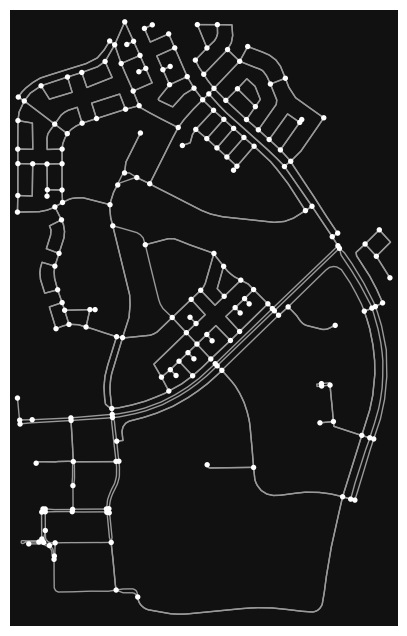

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [2]:
import osmnx as ox
import networkx as nx

G = ox.graph_from_bbox(34.807635178835326, 34.822905885303406, 135.49357385434783, 135.50546975549372, network_type='drive')
ox.plot_graph(G)

In [3]:
new_G = G.copy()
for u, v, data in G.edges(data=True):
    # print(data['highway'])
    if data['highway'] == 'primary' or data['highway'] == 'primary_link' or data['highway'] == 'trunk' or data['highway'] == 'trunk_link':
        new_G.remove_edge(u, v)

In [4]:
# グラフの最大の連結成分を取得
cG = max(nx.strongly_connected_components(new_G), key=len)

new_G = new_G.subgraph(cG)

In [5]:
stops=[]

east_neighborhood_center= (34.81272,135.50299)
stops.append(east_neighborhood_center)


north_neighborhood_center=(34.81900900276728, 135.49708219503972)
stops.append(north_neighborhood_center)

north_medical_center=(34.819994604762066, 135.49794022317872)
stops.append(north_medical_center)

east_medical_center=(34.81347088513504, 135.50299678003324)
stops.append(east_medical_center)

five_intersection=(34.8171770364642, 135.5035658782554)
stops.append(five_intersection)

tsutsuji_park=(34.82063841449645, 135.49743287310997)
stops.append(tsutsuji_park)

daisan_park=(34.822114051388006, 135.49740347498908)
stops.append(daisan_park)

daini_park=(34.8204405882456, 135.4949841224769)
stops.append(daini_park)

daiichi_park=(34.81917666064871, 135.49414190887416)
stops.append(daiichi_park)

north_daiichi_park=(34.818225399218186, 135.49512359732296)
stops.append(north_daiichi_park)

north_daisan_park=(34.817467905421054, 135.49418482421137)
stops.append(north_daisan_park)

north_daini_park=(34.81550807806511, 135.49413654445289)
stops.append(north_daini_park)

north_third_daini_park=(34.81438669786503, 135.49835935648593)
stops.append(north_third_daini_park)

hirado_park=(34.81525176788284, 135.4984433032334)
stops.append(hirado_park)

north_third_daiichi_park=(34.81532306446094, 135.499470927252)
stops.append(north_third_daiichi_park)

kashinoki_park=(34.817744224665404, 135.502181566538)
stops.append(kashinoki_park)

senrichuo_park=(34.808650299350276, 135.50371034776882)
stops.append(senrichuo_park)

hankyu_hotel=(34.80815134037952, 135.49720505781787)
stops.append(hankyu_hotel)

ryokuchi=(34.82163788658993, 135.49518764106796)
stops.append(ryokuchi)

conbini=(34.814536470352735, 135.49683970096063)
stops.append(conbini)

sev_a=(34.81589743712799, 135.50420708704235)
stops.append(sev_a)

sev_b=(34.81550555700882, 135.50216698192293)
stops.append(sev_b)

sev_c=(34.81257418957032, 135.49742438208017)
stops.append(sev_c)

sev_d=(34.81156498703356, 135.49948677264575)
stops.append(sev_d)

sev_e=(34.81134900332308, 135.50088694512596)
stops.append(sev_e)

sev_f=(34.81185760922213, 135.50097180406414)
stops.append(sev_f)

sev_g=(34.80769809616952, 135.50068328368718)
stops.append(sev_g)

sev_h=(34.8085063261857, 135.50331391084322)
stops.append(sev_h)

sev_i=(34.80934938525221, 135.50361091712688)
stops.append(sev_i)

nodes=[]
for i in range(0, len(stops)):
    nodes.append(ox.nearest_nodes(new_G, stops[i][1], stops[i][0]))
    
print(nodes)


[11161004868, 1907023671, 4908380485, 11022078841, 1872318167, 1387136412, 1707885334, 1707885270, 1707885201, 1871584898, 4908380451, 1959950611, 1707884995, 4908243814, 8499424546, 4908380501, 1387125487, 4911730782, 4908380492, 4908380625, 1811065051, 1872318028, 4814444401, 1811064897, 1872317600, 1872317600, 4911730782, 1584726511, 1584726511]


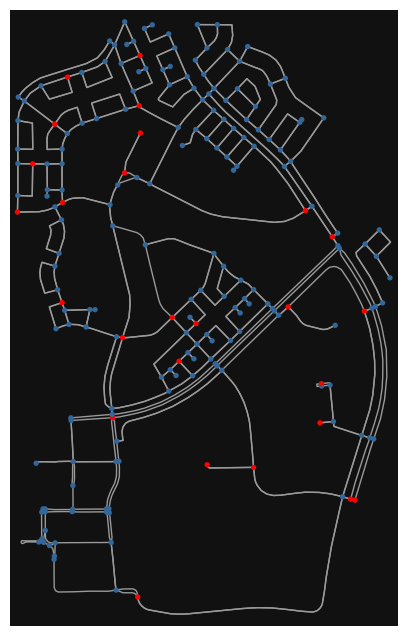

In [6]:
nc = ['r' if node in nodes else '#336699' for node in new_G.nodes()]
fig, ax = ox.plot_graph(new_G, node_color=nc, filepath='image.png', save=False, show=True, close=True)


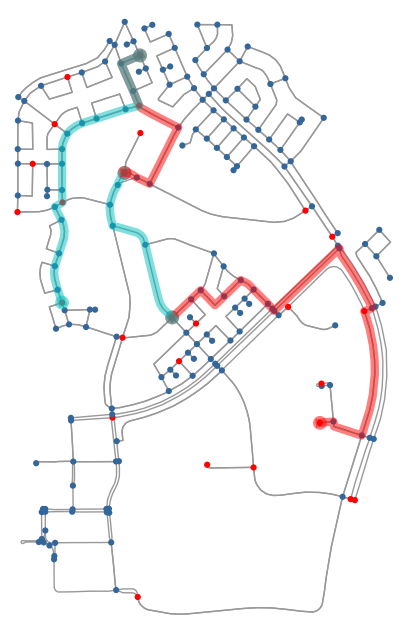

In [7]:
# calculate shortest paths for the 2 routes
route1 = nx.shortest_path(new_G, nodes[0], nodes[13], weight='length')
route2 = nx.shortest_path(new_G, nodes[13], nodes[1], weight='length')
route3 = nx.shortest_path(new_G, nodes[1], nodes[6], weight='length')
route4 = nx.shortest_path(new_G, nodes[6], nodes[11], weight='length')
routes = [route1, route2, route3, route4]
rc = ['r', 'c', 'r', 'c']

nc = ['r' if node in nodes else '#336699' for node in new_G.nodes()]
fig, ax = ox.plot_graph_routes(new_G, routes, node_color=nc, node_size=20,  route_colors=rc, route_linewidths=6, bgcolor='#FFFFFF', filepath='for_ppt.png', save=False, show=True, close=True)

[1872318139, 1871584710, 1419260630, 4814444401, 4908243769]


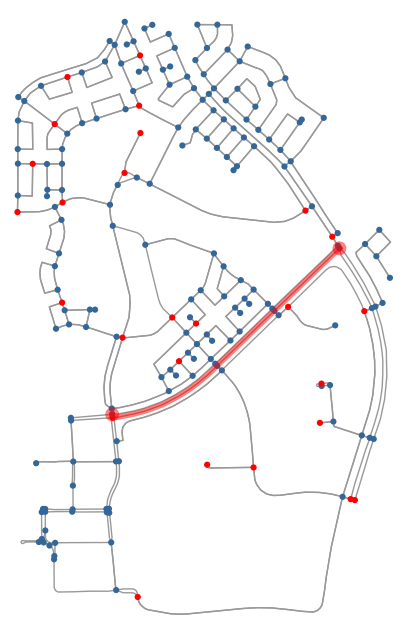

In [8]:
roadblock=[]
roadblock_east=(34.817010579253875, 135.50367977275937)
roadblock.append(roadblock_east)
roadblock_west=(34.81270737357197, 135.4966756238268)
roadblock.append(roadblock_west)
points=[]
points.append(ox.nearest_nodes(new_G, roadblock[0][1], roadblock[0][0]))
points.append(ox.nearest_nodes(new_G, roadblock[1][1], roadblock[1][0]))

nc = ['r' if node in nodes else '#336699' for node in new_G.nodes()]
#fig, ax = ox.plot_graph(new_G, node_color=nc, show=True, close=True)
route = nx.shortest_path(new_G, points[0], points[1], weight='length')
print(route)
fig, ax = ox.plot_graph_route(new_G, route, node_color=nc, node_size=20, route_color='r', route_linewidth=4, bgcolor='#FFFFFF', show=True)


In [9]:
G[1872318139][1871584710][0]['osmid']

203571085

In [10]:
new_G = new_G.copy()
for i in range(len(route)-1):
    first=route[i]
    second=route[i+1]
    osmid=G[first][second][0]['osmid']

    for u, v, data in G.edges(data=True):
    # print(data['highway'])
        if data['osmid'] == osmid and u==first and v==second:
            print(u, v)
            new_G.remove_edge(u, v)
            

1872318139 1871584710
1871584710 1419260630
1419260630 4814444401
4814444401 4908243769


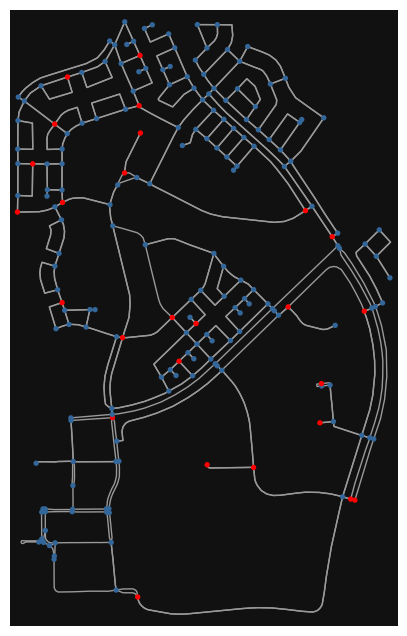

In [11]:
fig, ax = ox.plot_graph(new_G, node_color=nc, show=True, close=True)


In [12]:
for i in range(4,len(nodes)):
    for j in range (i+1, len(nodes)):
        route = nx.shortest_path(new_G, nodes[i], nodes[j], weight='length')
        print(route)
        #fig, ax = ox.plot_graph_route(new_G, route, node_color=nc, node_size=20, route_color='r', route_linewidth=4, bgcolor='#FFFFFF', show=True)


[1872318167, 1387125457, 4908380501, 4908380503, 1707885248, 1707885264, 1707885279, 1707885297, 4908380494, 8499413814, 1387136412]
[1872318167, 1387125457, 4908380501, 4908380503, 1707885248, 1707885264, 1707885279, 1707885297, 4908380494, 8499413814, 1387136412, 1707885318, 1707885331, 1707885334]
[1872318167, 1387125457, 4908380501, 4908380503, 1707885248, 1707885264, 1707885279, 1707885297, 4908380494, 8499413814, 1387136412, 1707885295, 1387136437, 1707885275, 1387136445, 1707885270]
[1872318167, 1387125457, 4908380501, 4908380496, 1189321058, 4908380449, 4908380450, 1871584898, 1387136457, 1707885174, 1707885200, 1707885201]
[1872318167, 1387125457, 4908380501, 4908380496, 1189321058, 4908380449, 4908380450, 1871584898]
[1872318167, 1387125457, 4908380501, 4908380496, 1189321058, 4908380449, 4908380450, 1871584898, 4908380470, 4908380451]
[1872318167, 1387125457, 4908380501, 4908380496, 1189321058, 4908380449, 4908380450, 1871584898, 4908380470, 1959950965, 1959950893, 195995081

In [13]:
for i in range(len(nodes)-1):
        route = nx.shortest_path(new_G, nodes[i+1], nodes[i], weight='length')
        print(i+1, i)
        fig, ax = ox.plot_graph_route(new_G, route, node_color=nc, node_size=20, route_color='r', route_linewidth=4, bgcolor='#FFFFFF', show=False)


1 0


2 1
3 2
4 3
5 4
6 5
7 6
8 7
9 8
10 9
11 10
12 11
13 12
14 13
15 14
16 15
17 16
18 17
19 18
20 19
21 20
22 21
23 22
24 23
25 24
26 25
27 26
28 27


In [14]:
import numpy as np
distance_matrix = np.zeros((len(nodes), len(nodes)))

for i in range(len(nodes)):
    for j in range(len(nodes)):
        try:
            distance_matrix[i][j] = nx.shortest_path_length(new_G, nodes[i], nodes[j], weight='length')
        except:
            distance_matrix[i][j] = 1000000000

In [15]:
distance_matrix

array([[   0.   , 1506.024, 1630.486,  174.858,  760.332, 1559.674,
        1750.074, 1828.946, 1860.977, 1668.227, 1803.287, 1971.96 ,
        1561.615, 1585.295, 1574.615,  887.808,  356.006, 1197.538,
        1920.855, 1747.068,  501.372, 1197.027, 1516.676,  769.906,
         631.641,  631.641, 1197.538,  345.311,  345.311],
       [1457.643,    0.   ,  124.462, 1554.889,  684.726,  390.213,
         580.613,  546.857,  493.919,  301.169,  436.229,  614.677,
         888.186,  712.897,  810.695,  557.25 , 1493.935, 1367.675,
         751.394,  551.124,  956.271, 1173.959,  785.637, 1580.451,
        1442.186, 1442.186, 1367.675, 1506.347, 1506.347],
       [1582.105,  124.462,    0.   , 1679.351,  809.188,  514.675,
         705.075,  671.319,  618.381,  425.631,  560.691,  739.139,
        1012.648,  837.359,  935.157,  681.712, 1618.397, 1492.137,
         875.856,  675.586, 1080.733, 1298.421,  910.099, 1704.913,
        1566.648, 1566.648, 1492.137, 1630.809, 1630.809],
       

In [16]:
# #specify path for export
# path = r'/Users/satokamimura/Desktop/seniorproject/dist.txt'

# #export DataFrame to text file
# with open(path, 'a') as f:
#     f.write(str(len(nodes)))
#     f.write('\n')
#     for i in range(0, len(distance_matrix)):
#         for j in range(0, len(distance_matrix[i])):
#             f.write( "{:.2f}".format(distance_matrix[i][j])) 
#             f.write(' ') 
#         f.write('\n')

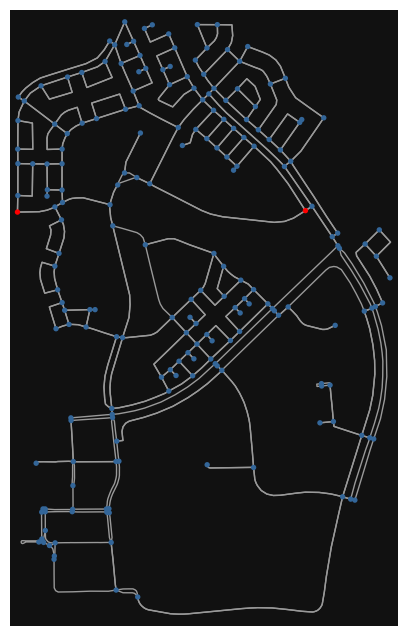

In [17]:
show=[nodes[15], nodes[10]]
nc = ['r' if node in show else '#336699' for node in new_G.nodes()]
fig, ax = ox.plot_graph(new_G, node_color=nc, show=True, close=True)


29 28


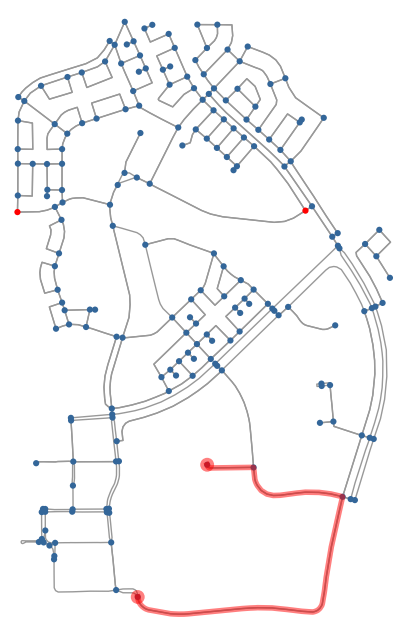

In [18]:
route = nx.shortest_path(new_G, nodes[23], nodes[26], weight='length')
print(i+1, i)
fig, ax = ox.plot_graph_route(new_G, route, node_color=nc, node_size=20, route_color='r', route_linewidth=4, bgcolor='#FFFFFF', show=True)

In [19]:
distance_matrix[15][10]

915.4789999999998

In [20]:
route = nx.shortest_path(new_G, nodes[3], nodes[11], weight='length')
print(route)

[11022078841, 4769506218, 6355851634, 1811064928, 1387125485, 1872317600, 1387125507, 1811065047, 1871584710, 1419260902, 4908243803, 4908244022, 4908244023, 1707885042, 4908243812, 4908243813, 4908243814, 4908380625, 1906990639, 4908380218, 4908380216, 1959950586, 1959950611]


In [21]:
nodes[11]

1959950611

In [22]:
patrol= np.empty([len(nodes), len(nodes), len(nodes)])
count=0
for i in range(len(nodes)):
    for j in range(len(nodes)):
        route = nx.shortest_path(new_G, nodes[i], nodes[j], weight='length')
        count=0
        for m in route[1:-1]:
            for n in range(len(nodes)):
                if(m==nodes[n]):
                    patrol[i][j][count]=n
                    count+=1
        patrol[i][j][count]=1000

for i in range(len(nodes)):
    for j in range(len(nodes)):
        for m in range(len(nodes)):
            print(patrol[i][j][m])
            if(patrol[i][j][m]==1000):
                break
            
   

# for i in range(len(nodes)):
#     for j in range(len(nodes)):
#         for m in range(len(nodes)):
#             print(patrol[i][j][m])

1000.0
20.0
4.0
15.0
1000.0
20.0
4.0
15.0
1.0
1000.0
1000.0
20.0
1000.0
20.0
4.0
15.0
1000.0
20.0
4.0
15.0
5.0
1000.0
20.0
4.0
15.0
5.0
1000.0
20.0
4.0
15.0
9.0
1000.0
20.0
4.0
15.0
1000.0
20.0
4.0
15.0
9.0
1000.0
24.0
25.0
13.0
19.0
1000.0
24.0
25.0
1000.0
24.0
25.0
1000.0
24.0
25.0
1000.0
20.0
4.0
1000.0
1000.0
1000.0
20.0
4.0
15.0
5.0
1000.0
24.0
25.0
13.0
1000.0
1000.0
24.0
25.0
1000.0
24.0
25.0
1000.0
24.0
25.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
15.0
4.0
20.0
1000.0
1000.0
1000.0
15.0
4.0
20.0
1000.0
15.0
1000.0
1000.0
5.0
1000.0
9.0
1000.0
9.0
1000.0
1000.0
9.0
1000.0
9.0
1000.0
19.0
13.0
1000.0
19.0
1000.0
19.0
13.0
1000.0
1000.0
15.0
4.0
1000.0
19.0
22.0
1000.0
5.0
1000.0
1000.0
15.0
4.0
1000.0
19.0
13.0
1000.0
19.0
1000.0
19.0
24.0
25.0
1000.0
19.0
1000.0
19.0
1000.0
19.0
22.0
1000.0
15.0
4.0
16.0
1000.0
15.0
4.0
16.0
1000.0
1.0
15.0
4.0
20.0
1000.0
1000.0
1000.0
1.0
15.0
4.0
20.0
1000.0
1.0
15.0
1000.0
1.0
1000.0
1.0
5.0
1000.0
1.0
9.0
1000.0
1.0
9.0
1000.0
1.0
1000.0


In [23]:
# #specify path for export
# path = r'/Users/satokamimura/Desktop/seniorproject/dist.txt'

# #export DataFrame to text file
# with open(path, 'w') as f:
#     f.write(str(len(nodes)))
#     f.write('\n')
#     for i in range(0, len(distance_matrix)):
#         for j in range(0, len(distance_matrix[i])):
#             f.write( "{:.2f}".format(distance_matrix[i][j])) 
#             f.write(' ') 
#         f.write('\n')
#     f.write('\n')
#     f.write('\n')
    
#     for i in range(len(nodes)):
#         for j in range(len(nodes)):
#             for m in range(len(nodes)):
#                 f.write("{:.0f}".format(patrol[i][j][m]))
#                 f.write(' ') 
#                 if(patrol[i][j][m]==1000):
#                     f.write('\n')
#                     break

In [24]:
for m in range(len(nodes)):
            print(patrol[13][22][m])
            if(patrol[i][j][m]==1000):
                break

19.0


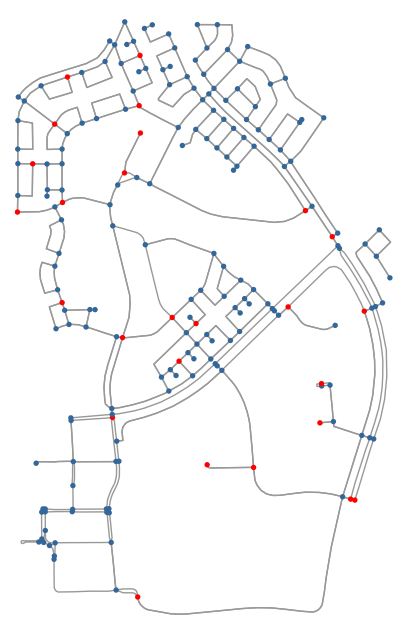

In [25]:
nc = ['r' if node in nodes else '#336699' for node in new_G.nodes()]
fig, ax = ox.plot_graph(new_G, node_color=nc, bgcolor='#FFFFFF', filepath='for_paper.png', save=False, show=True, close=True)


In [26]:
print(len(nodes))

29
